# 线性模型

## 1.通过正规方程求解线性模型

$$y = \theta_0 + \theta_1 x_1 + \cdots + \theta_n x_n$$

$$\theta = (X^T \cdot X)^{-1}\cdot X^T\cdot y$$

In [1]:
import numpy as np

In [6]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
# rand生成[0, 1]的均匀分布，randn生成标准正态分布

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

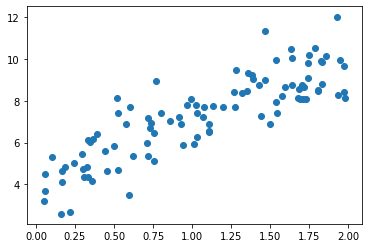

In [9]:
plt.scatter(X, y)

In [12]:
X_b = np.c_[np.ones((100, 1)), X]

In [15]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [18]:
theta_best

array([[4.20085386],
       [2.89571253]])

In [20]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.20085386],
       [9.99227891]])

[0, 2, 0, 15]

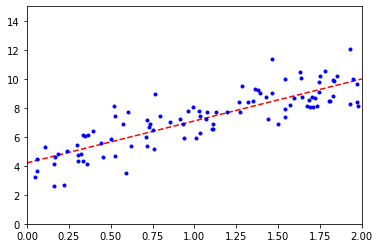

In [21]:
plt.plot(X_new, y_predict, 'r--')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])

## 2.通过sklearn

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
# 和前面采用正规方程计算结果一模一样

(array([4.20085386]), array([[2.89571253]]))

## 关于复杂度

只要涉及矩阵求逆，复杂度就低不了，$O(n^{2.4})\sim O(n^3)$（注意：里面的$n$是特征数，不是样本数）

对于大样本、多特征数据，可以采用梯度下降优化

### 1.梯度下降

In [29]:
eta = 0.1
n_iterations = 100
m = 100

theta = np.random.randn(2, 1)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - gradients

In [25]:
theta

array([[nan],
       [nan]])

In [36]:
X_b.shape

(100, 2)

### 2.随机梯度下降

In [37]:
n_epochs = 50
t0, t1 = 5, 50 # hyperparameter

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        # eta逐渐减小，类似于模拟退火

In [38]:
theta

array([[4.28085713],
       [2.93102088]])

In [42]:
X_b[10].shape

(2,)

In [47]:
# 通过sklearn使用随机梯度下降
from sklearn.linear_model import SGDRegressor
sgd_reg  = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [48]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.12926901]), array([2.86382022]))

### 3.小批量（mini-batch）梯度下降

在上述两者中取折中，GD每次算梯度取所有的样本，SGD每次随机取一个样本。

mini-batchGD则取一个小数量的值（比如5、10），优点是利用矩阵运算的硬件优化（利用到硬件的并行能力）